In [2]:
import pandas as pd
import numpy as np
import MySQLdb
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import numpy as np

In [71]:
db = MySQLdb.connect(host='104.154.94.28',db='loganp',\
                     read_default_file="~/.my.cnf",\
                     autocommit=True,\
                     local_infile = 1)
c=db.cursor()

In [100]:
# All the pulsars in ATNF catalog within dec -90 & 0, ordered by S1400 flux:
k=pd.read_csv('../atnf_all_psr_lessthan45dec.csv',delimiter=',',comment='#')
k

,NAME,PSRJ,RAJ,DECJ,PMRA,PMDEC,PX,POSEPOCH,ELONG,ELAT,...,AGE,BSURF,EDOT,EDOTD2,PMTOT,VTRANS,P1_I,AGE_I,BSURF_I,B_LC
0,J0006+1834,J0006+1834,00:06:04.8,+18:34:59,*,*,*,49079.50,8.986,16.402,...,5.24e+06,1.22e+12,2.48e+32,3.35e+32,*,*,*,*,*,3.43e+01
1,J0011+08,J0011+08,00:11:34,+08:10,*,*,*,57022.00,5.909,6.342,...,*,*,*,*,*,*,*,*,*,*
2,J0023+0923,J0023+0923,00:23:16.8,+09:23:23.8,*,*,0.930,56567.00,9.070,6.309,...,4.23e+09,1.89e+08,1.59e+34,1.37e+34,13.903,70.876,9.88e-21,4.89e+09,1.76e+08,6.24e+04
3,J0024-7201Z,J0024-7201Z,00:24:06.0,-72:05:01.4,4.000,1.000,*,51600.00,311.248,-62.354,...,*,*,*,*,4.123,50.042,-5.02e-21,-1.44e+10,NaN,*
4,J0024-7204aa,J0024-7204aa,00:24:05.6,-72:04:52.6,*,*,*,57022.00,311.252,-62.353,...,*,*,*,*,*,*,*,*,*,*
5,J0024-7204ab,J0024-7204ab,00:24:08.1,-72:04:47.6,4.200,-2.900,*,51600.00,311.259,-62.355,...,5.98e+09,1.93e+08,7.62e+33,1.18e+33,5.104,61.462,9.22e-21,6.36e+09,1.87e+08,3.56e+04
6,B0021-72C,J0024-7204C,00:23:50.3,-72:04:31.5,5.200,-3.100,*,51600.00,311.241,-62.333,...,*,*,*,*,6.054,134.610,-5.23e-20,-1.75e+09,NaN,*
7,B0021-72D,J0024-7204D,00:24:13.8,-72:04:43.8,4.240,-2.240,*,51600.00,311.269,-62.360,...,*,*,*,*,4.795,106.625,-4.83e-21,-1.76e+10,NaN,*
8,B0021-72E,J0024-7204E,00:24:11.1,-72:05:20.1,6.150,-2.350,*,51600.00,311.246,-62.363,...,5.69e+08,5.97e+08,8.79e+34,4.00e+33,6.584,146.389,9.68e-20,5.79e+08,5.92e+08,1.27e+05
9,B0021-72F,J0024-7204F,00:24:03.8,-72:04:42.8,4.520,-2.500,*,51600.00,311.255,-62.349,...,6.44e+08,4.16e+08,1.41e+35,6.41e+33,5.165,114.851,6.37e-20,6.53e+08,4.14e+08,2.16e+05


In [94]:
#k=k.loc[:, ~k.columns.str.contains('^Unnamed')] # Removes the Unnamed columns


In [79]:
#k.to_csv('../atnf_all_psr_lessthan45dec.csv',index=False)

In [95]:
#k=pd.read_csv('../atnf_all_psr_lessthan45dec.csv')

In [101]:
# All the ones with S1400 values:
m=k.loc[np.where(k['S1400'].values>'0')[0]]
print m.shape

(1712, 68)


In [102]:
#All the ones with S400 values but not S1400
mm=k.loc[np.where(k['S400'].values>'0')[0]]
mm=mm.reset_index(drop=True)
mm=mm.loc[np.where(mm['S1400'].values<'0')[0]]
mm=mm.reset_index(drop=True)

In [103]:
#All the ones with S2000 values but not S1400 or S400:
mmm=k.loc[np.where(k['S2000'].values>'0')[0]]
mmm=mmm.reset_index(drop=True)
mmm=mmm.loc[np.where(mmm['S1400'].values<'0')[0]]
mmm=mmm.reset_index(drop=True)
mmm=mmm.loc[np.where(mmm['S400'].values<'0')[0]]
mmm=mmm.reset_index(drop=True)

In [104]:
print m.shape,mm.shape,mmm.shape
tot = m.shape[0]+mm.shape[0]+mmm.shape[0]
print tot

(1712, 68) (205, 68) (45, 68)
1962


In [105]:
tot=pd.concat([m,mm,mmm])
tot=tot.reset_index(drop=True)
tot

,NAME,PSRJ,RAJ,DECJ,PMRA,PMDEC,PX,POSEPOCH,ELONG,ELAT,...,AGE,BSURF,EDOT,EDOTD2,PMTOT,VTRANS,P1_I,AGE_I,BSURF_I,B_LC
0,J0023+0923,J0023+0923,00:23:16.8,+09:23:23.8,*,*,0.930,56567.00,9.070,6.309,...,4.23e+09,1.89e+08,1.59e+34,1.37e+34,13.903,70.876,9.88e-21,4.89e+09,1.76e+08,6.24e+04
1,B0021-72C,J0024-7204C,00:23:50.3,-72:04:31.5,5.200,-3.100,*,51600.00,311.241,-62.333,...,*,*,*,*,6.054,134.610,-5.23e-20,-1.75e+09,NaN,*
2,J0030+0451,J0030+0451,00:30:27.4,+04:51:39.7,*,*,3.080,55390.00,8.910,1.446,...,7.58e+09,2.25e+08,3.49e+33,3.31e+34,6.232,9.592,1.00e-20,7.69e+09,2.23e+08,1.83e+04
3,J0034-0534,J0034-0534,00:34:21.8,-05:34:36.7,7.900,-9.200,*,50690.00,5.672,-8.528,...,5.99e+09,9.77e+07,2.96e+34,1.63e+34,12.126,77.613,4.06e-21,7.32e+09,8.83e+07,1.38e+05
4,B0031-07,J0034-0721,00:34:08.8,-07:21:53.4,10.370,-11.130,0.930,52275.00,4.900,-10.147,...,3.66e+07,6.28e+11,1.92e+31,1.81e+31,15.212,74.285,4.08e-16,3.66e+07,6.27e+11,7.02e+00
5,J0045-7042,J0045-7042,00:45:25.6,-70:42:07.1,*,*,*,52407.00,315.743,-63.103,...,4.02e+06,1.27e+12,3.89e+32,1.09e+29,*,*,*,*,*,4.71e+01
6,J0045-7319,J0045-7319,00:45:35.1,-73:19:03.0,*,*,*,49144.00,310.543,-64.347,...,3.29e+06,2.06e+12,2.22e+32,6.22e+28,*,*,*,*,*,2.43e+01
7,J0101-6422,J0101-6422,01:01:11.1,-64:22:30.1,10.000,-12.000,*,55520.00,328.666,-60.765,...,7.90e+09,1.17e+08,1.20e+34,1.20e+34,15.620,74.056,3.63e-21,1.12e+10,9.79e+07,6.42e+04
8,J0111-7131,J0111-7131,01:11:28.7,-71:31:46.8,*,*,*,52369.00,316.305,-65.353,...,1.54e+06,2.24e+12,8.58e+32,2.41e+29,*,*,*,*,*,6.42e+01
9,J0113-7220,J0113-7220,01:13:11.0,-72:20:32.2,*,*,*,51212.00,314.637,-65.802,...,1.06e+06,1.27e+12,5.54e+33,1.56e+30,*,*,*,*,*,3.45e+02


### Remove ones on MSP list:

In [108]:
# Remove ones on MSP list
kk=pd.read_csv('../MeerTime_MSP/meertime_msp_targets.csv')
# We only want to merge on the name column:
kk=kk[['NAME']]

In [109]:
df_all = tot.merge(kk.drop_duplicates(), on=['NAME'], how='left', indicator=True)
df_all

,NAME,PSRJ,RAJ,DECJ,PMRA,PMDEC,PX,POSEPOCH,ELONG,ELAT,...,BSURF,EDOT,EDOTD2,PMTOT,VTRANS,P1_I,AGE_I,BSURF_I,B_LC,_merge
0,J0023+0923,J0023+0923,00:23:16.8,+09:23:23.8,*,*,0.930,56567.00,9.070,6.309,...,1.89e+08,1.59e+34,1.37e+34,13.903,70.876,9.88e-21,4.89e+09,1.76e+08,6.24e+04,both
1,B0021-72C,J0024-7204C,00:23:50.3,-72:04:31.5,5.200,-3.100,*,51600.00,311.241,-62.333,...,*,*,*,6.054,134.610,-5.23e-20,-1.75e+09,NaN,*,both
2,J0030+0451,J0030+0451,00:30:27.4,+04:51:39.7,*,*,3.080,55390.00,8.910,1.446,...,2.25e+08,3.49e+33,3.31e+34,6.232,9.592,1.00e-20,7.69e+09,2.23e+08,1.83e+04,both
3,J0034-0534,J0034-0534,00:34:21.8,-05:34:36.7,7.900,-9.200,*,50690.00,5.672,-8.528,...,9.77e+07,2.96e+34,1.63e+34,12.126,77.613,4.06e-21,7.32e+09,8.83e+07,1.38e+05,both
4,B0031-07,J0034-0721,00:34:08.8,-07:21:53.4,10.370,-11.130,0.930,52275.00,4.900,-10.147,...,6.28e+11,1.92e+31,1.81e+31,15.212,74.285,4.08e-16,3.66e+07,6.27e+11,7.02e+00,left_only
5,J0045-7042,J0045-7042,00:45:25.6,-70:42:07.1,*,*,*,52407.00,315.743,-63.103,...,1.27e+12,3.89e+32,1.09e+29,*,*,*,*,*,4.71e+01,left_only
6,J0045-7319,J0045-7319,00:45:35.1,-73:19:03.0,*,*,*,49144.00,310.543,-64.347,...,2.06e+12,2.22e+32,6.22e+28,*,*,*,*,*,2.43e+01,left_only
7,J0101-6422,J0101-6422,01:01:11.1,-64:22:30.1,10.000,-12.000,*,55520.00,328.666,-60.765,...,1.17e+08,1.20e+34,1.20e+34,15.620,74.056,3.63e-21,1.12e+10,9.79e+07,6.42e+04,both
8,J0111-7131,J0111-7131,01:11:28.7,-71:31:46.8,*,*,*,52369.00,316.305,-65.353,...,2.24e+12,8.58e+32,2.41e+29,*,*,*,*,*,6.42e+01,left_only
9,J0113-7220,J0113-7220,01:13:11.0,-72:20:32.2,*,*,*,51212.00,314.637,-65.802,...,1.27e+12,5.54e+33,1.56e+30,*,*,*,*,*,3.45e+02,left_only


In [110]:
# Drop the ones from tot that appear on both lists:
tot = df_all.drop(df_all[df_all['_merge'] == 'both'].index)
tot

,NAME,PSRJ,RAJ,DECJ,PMRA,PMDEC,PX,POSEPOCH,ELONG,ELAT,...,BSURF,EDOT,EDOTD2,PMTOT,VTRANS,P1_I,AGE_I,BSURF_I,B_LC,_merge
4,B0031-07,J0034-0721,00:34:08.8,-07:21:53.4,10.370,-11.130,0.930,52275.00,4.900,-10.147,...,6.28e+11,1.92e+31,1.81e+31,15.212,74.285,4.08e-16,3.66e+07,6.27e+11,7.02e+00,left_only
5,J0045-7042,J0045-7042,00:45:25.6,-70:42:07.1,*,*,*,52407.00,315.743,-63.103,...,1.27e+12,3.89e+32,1.09e+29,*,*,*,*,*,4.71e+01,left_only
6,J0045-7319,J0045-7319,00:45:35.1,-73:19:03.0,*,*,*,49144.00,310.543,-64.347,...,2.06e+12,2.22e+32,6.22e+28,*,*,*,*,*,2.43e+01,left_only
8,J0111-7131,J0111-7131,01:11:28.7,-71:31:46.8,*,*,*,52369.00,316.305,-65.353,...,2.24e+12,8.58e+32,2.41e+29,*,*,*,*,*,6.42e+01,left_only
9,J0113-7220,J0113-7220,01:13:11.0,-72:20:32.2,*,*,*,51212.00,314.637,-65.802,...,1.27e+12,5.54e+33,1.56e+30,*,*,*,*,*,3.45e+02,left_only
10,J0131-7310,J0131-7310,01:31:28.5,-73:10:09.3,*,*,*,52335.00,313.872,-67.360,...,7.92e+11,1.65e+33,4.62e+29,*,*,*,*,*,1.76e+02,left_only
11,J0134-2937,J0134-2937,01:34:18.6,-29:37:17.0,13.000,-11.000,*,54428.00,8.735,-36.285,...,1.05e+11,1.20e+33,1.93e+30,17.029,2018.393,7.60e-17,2.86e+07,1.03e+11,3.83e+02,left_only
12,B0148-06,J0151-0635,01:51:22.7,-06:35:02.8,15.000,-30.000,*,49347.00,23.399,-16.844,...,8.15e+11,5.56e+30,8.90e+27,33.541,3975.421,3.43e-16,6.78e+07,7.17e+11,2.43e+00,left_only
13,B0149-16,J0152-1637,01:52:10.8,-16:37:52.9,3.100,-27.000,*,48227.00,19.501,-26.218,...,1.05e+12,8.88e+31,1.05e+32,27.177,118.539,1.30e-15,1.02e+07,1.05e+12,1.71e+01,left_only
14,B0203-40,J0206-4028,02:06:01.2,-40:28:04.3,-10.000,75.000,*,46902.00,9.332,-48.904,...,8.80e+11,1.89e+32,1.19e+32,75.664,451.986,1.19e-15,8.41e+06,8.76e+11,3.29e+01,left_only


### Remove ones on binaries list:

In [120]:
# remove ones on Binaries:
kk=pd.read_csv('../MeerTime_Binaries/MeerTime_binaries_atnfcatalog_notgc.csv')
kk=kk.loc[:, ~kk.columns.str.contains('^Unnamed')]
kk=kk[['NAME']]

In [112]:
tot=tot.drop(columns='_merge')

In [121]:
df_all = tot.merge(kk.drop_duplicates(), on=['NAME'], how='left', indicator=True)
df_all

,NAME,PSRJ,RAJ,DECJ,PMRA,PMDEC,PX,POSEPOCH,ELONG,ELAT,...,BSURF,EDOT,EDOTD2,PMTOT,VTRANS,P1_I,AGE_I,BSURF_I,B_LC,_merge
0,B0031-07,J0034-0721,00:34:08.8,-07:21:53.4,10.370,-11.130,0.930,52275.00,4.900,-10.147,...,6.28e+11,1.92e+31,1.81e+31,15.212,74.285,4.08e-16,3.66e+07,6.27e+11,7.02e+00,left_only
1,J0045-7042,J0045-7042,00:45:25.6,-70:42:07.1,*,*,*,52407.00,315.743,-63.103,...,1.27e+12,3.89e+32,1.09e+29,*,*,*,*,*,4.71e+01,left_only
2,J0045-7319,J0045-7319,00:45:35.1,-73:19:03.0,*,*,*,49144.00,310.543,-64.347,...,2.06e+12,2.22e+32,6.22e+28,*,*,*,*,*,2.43e+01,left_only
3,J0111-7131,J0111-7131,01:11:28.7,-71:31:46.8,*,*,*,52369.00,316.305,-65.353,...,2.24e+12,8.58e+32,2.41e+29,*,*,*,*,*,6.42e+01,left_only
4,J0113-7220,J0113-7220,01:13:11.0,-72:20:32.2,*,*,*,51212.00,314.637,-65.802,...,1.27e+12,5.54e+33,1.56e+30,*,*,*,*,*,3.45e+02,left_only
5,J0131-7310,J0131-7310,01:31:28.5,-73:10:09.3,*,*,*,52335.00,313.872,-67.360,...,7.92e+11,1.65e+33,4.62e+29,*,*,*,*,*,1.76e+02,left_only
6,J0134-2937,J0134-2937,01:34:18.6,-29:37:17.0,13.000,-11.000,*,54428.00,8.735,-36.285,...,1.05e+11,1.20e+33,1.93e+30,17.029,2018.393,7.60e-17,2.86e+07,1.03e+11,3.83e+02,left_only
7,B0148-06,J0151-0635,01:51:22.7,-06:35:02.8,15.000,-30.000,*,49347.00,23.399,-16.844,...,8.15e+11,5.56e+30,8.90e+27,33.541,3975.421,3.43e-16,6.78e+07,7.17e+11,2.43e+00,left_only
8,B0149-16,J0152-1637,01:52:10.8,-16:37:52.9,3.100,-27.000,*,48227.00,19.501,-26.218,...,1.05e+12,8.88e+31,1.05e+32,27.177,118.539,1.30e-15,1.02e+07,1.05e+12,1.71e+01,left_only
9,B0203-40,J0206-4028,02:06:01.2,-40:28:04.3,-10.000,75.000,*,46902.00,9.332,-48.904,...,8.80e+11,1.89e+32,1.19e+32,75.664,451.986,1.19e-15,8.41e+06,8.76e+11,3.29e+01,left_only


In [122]:
# Drop the ones from tot that appear on both lists:
tot = df_all.drop(df_all[df_all['_merge'] == 'both'].index)
tot

,NAME,PSRJ,RAJ,DECJ,PMRA,PMDEC,PX,POSEPOCH,ELONG,ELAT,...,BSURF,EDOT,EDOTD2,PMTOT,VTRANS,P1_I,AGE_I,BSURF_I,B_LC,_merge
0,B0031-07,J0034-0721,00:34:08.8,-07:21:53.4,10.370,-11.130,0.930,52275.00,4.900,-10.147,...,6.28e+11,1.92e+31,1.81e+31,15.212,74.285,4.08e-16,3.66e+07,6.27e+11,7.02e+00,left_only
1,J0045-7042,J0045-7042,00:45:25.6,-70:42:07.1,*,*,*,52407.00,315.743,-63.103,...,1.27e+12,3.89e+32,1.09e+29,*,*,*,*,*,4.71e+01,left_only
2,J0045-7319,J0045-7319,00:45:35.1,-73:19:03.0,*,*,*,49144.00,310.543,-64.347,...,2.06e+12,2.22e+32,6.22e+28,*,*,*,*,*,2.43e+01,left_only
3,J0111-7131,J0111-7131,01:11:28.7,-71:31:46.8,*,*,*,52369.00,316.305,-65.353,...,2.24e+12,8.58e+32,2.41e+29,*,*,*,*,*,6.42e+01,left_only
4,J0113-7220,J0113-7220,01:13:11.0,-72:20:32.2,*,*,*,51212.00,314.637,-65.802,...,1.27e+12,5.54e+33,1.56e+30,*,*,*,*,*,3.45e+02,left_only
5,J0131-7310,J0131-7310,01:31:28.5,-73:10:09.3,*,*,*,52335.00,313.872,-67.360,...,7.92e+11,1.65e+33,4.62e+29,*,*,*,*,*,1.76e+02,left_only
6,J0134-2937,J0134-2937,01:34:18.6,-29:37:17.0,13.000,-11.000,*,54428.00,8.735,-36.285,...,1.05e+11,1.20e+33,1.93e+30,17.029,2018.393,7.60e-17,2.86e+07,1.03e+11,3.83e+02,left_only
7,B0148-06,J0151-0635,01:51:22.7,-06:35:02.8,15.000,-30.000,*,49347.00,23.399,-16.844,...,8.15e+11,5.56e+30,8.90e+27,33.541,3975.421,3.43e-16,6.78e+07,7.17e+11,2.43e+00,left_only
8,B0149-16,J0152-1637,01:52:10.8,-16:37:52.9,3.100,-27.000,*,48227.00,19.501,-26.218,...,1.05e+12,8.88e+31,1.05e+32,27.177,118.539,1.30e-15,1.02e+07,1.05e+12,1.71e+01,left_only
9,B0203-40,J0206-4028,02:06:01.2,-40:28:04.3,-10.000,75.000,*,46902.00,9.332,-48.904,...,8.80e+11,1.89e+32,1.19e+32,75.664,451.986,1.19e-15,8.41e+06,8.76e+11,3.29e+01,left_only


In [123]:
tot=tot.drop(columns='_merge')

### Remove ones associated with globular cluster:

In [126]:
tot['ASSOC']

0                                              *
1                                      EXGAL:SMC
2                                      EXGAL:SMC
3                                      EXGAL:SMC
4                                      EXGAL:SMC
5                                      EXGAL:SMC
6                                              *
7                                              *
8                                              *
9                                              *
10                                             *
11                                             *
12                                             *
13                                             *
14                                             *
15                                             *
16                                             *
17                                             *
18                                     EXGAL:LMC
19                                             *
20                  

In [138]:
# Find and remove whereever the Assoc columns contains GC reference:

tot=tot[tot.ASSOC.str.contains("GC") == False]
tot=tot[tot.ASSOC.str.contains("LMC") == False]
tot=tot[tot.ASSOC.str.contains("SMC") == False]
tot=tot[tot.ASSOC.str.contains("M33") == False]
tot=tot.reset_index(drop=True)
tot['ASSOC']

0                                              *
1                                              *
2                                              *
3                                              *
4                                              *
5                                              *
6                                              *
7                                              *
8                                              *
9                                              *
10                                             *
11                                             *
12                                             *
13                                             *
14                                             *
15                                             *
16                                             *
17                                             *
18                                             *
19                                             *
20                  

In [139]:
tot.to_csv('meertime_1000PTA_possible_targets.csv',index=False)

In [72]:
string = 'SELECT ra,decl FROM master_gaia_database \
                    WHERE decl BETWEEN -90.0 and 45.0;'
dataframe = pd.read_sql(string, con=db)

<IPython.core.display.Javascript object>


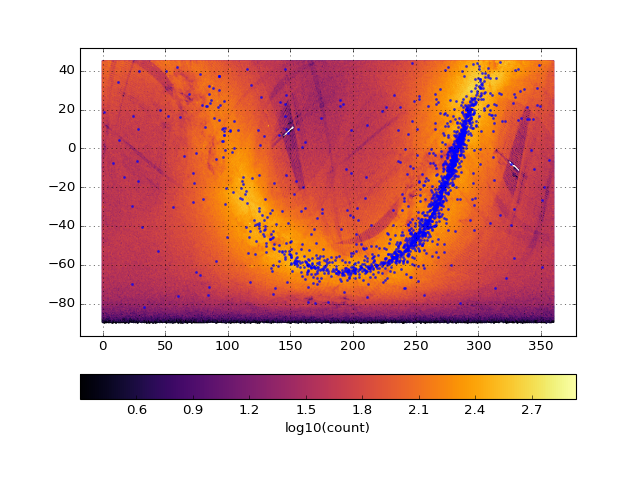

In [140]:
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
hb = ax.hexbin(dataframe['ra'], dataframe['decl'],gridsize=500,cmap='inferno',bins='log',mincnt=1)
ax.scatter(tot['RAJD'], tot['DECJD'],alpha=0.6,color='blue',s=10,marker='.')
#ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'],color='grey')
#ax.set_title('MeerTime 1000 PTA pointings \n')
cb = fig.colorbar(hb, ax=ax,orientation="horizontal", pad=0.1)
cb.set_label('log10(count)')
ax.grid(True)
plt.show()
#plt.savefig('MeerTime_1000PTA_pointings_mollweide.png',format='png',dpi=300)

In [51]:
print len(list(k))
for i,j in zip(list(k),range(len(list(k)))):
    print i,type(k[''+i+''][0])
list(k)

 68
NAME <type 'str'>
PSRJ <type 'str'>
RAJ <type 'str'>
DECJ <type 'str'>
PMRA <type 'str'>
PMDEC <type 'str'>
PX <type 'str'>
POSEPOCH <type 'str'>
ELONG <type 'numpy.float64'>
ELAT <type 'numpy.float64'>
PMELONG <type 'str'>
PMELAT <type 'str'>
Gl <type 'numpy.float64'>
Gb <type 'numpy.float64'>
RAJD <type 'numpy.float64'>
DECJD <type 'numpy.float64'>
P0 <type 'str'>
F0 <type 'str'>
F1 <type 'str'>
F2 <type 'str'>
F3 <type 'str'>
PEPOCH <type 'str'>
DM <type 'str'>
DM1 <type 'str'>
RM <type 'str'>
W50 <type 'str'>
W10 <type 'str'>
UNITS <type 'str'>
TAU_SC <type 'str'>
S400 <type 'str'>
S1400 <type 'str'>
S2000 <type 'str'>
BINARY <type 'str'>
T0 <type 'str'>
PB <type 'str'>
A1 <type 'str'>
OM <type 'str'>
ECC <type 'str'>
TASC <type 'str'>
EPS1 <type 'str'>
EPS2 <type 'str'>
Minimum <type 'str'>
Median <type 'str'>
BINCOMP <type 'str'>
DIST <type 'str'>
DIST_DM <type 'str'>
DM*sin(b) <type 'str'>
ZZ <type 'numpy.float64'>
XX <type 'numpy.float64'>
YY <type 'numpy.float64'>
ASSOC <t

['NAME',
 'PSRJ',
 'RAJ',
 'DECJ',
 'PMRA',
 'PMDEC',
 'PX',
 'POSEPOCH',
 'ELONG',
 'ELAT',
 'PMELONG',
 'PMELAT',
 'Gl',
 'Gb',
 'RAJD',
 'DECJD',
 'P0',
 'F0',
 'F1',
 'F2',
 'F3',
 'PEPOCH',
 'DM',
 'DM1',
 'RM',
 'W50',
 'W10',
 'UNITS',
 'TAU_SC',
 'S400',
 'S1400',
 'S2000',
 'BINARY',
 'T0',
 'PB',
 'A1',
 'OM',
 'ECC',
 'TASC',
 'EPS1',
 'EPS2',
 'Minimum',
 'Median',
 'BINCOMP',
 'DIST',
 'DIST_DM',
 'DM*sin(b)',
 'ZZ',
 'XX',
 'YY',
 'ASSOC',
 'SURVEY',
 'OSURVEY',
 'DISC.',
 'PSR',
 'NGLT',
 'R_LUM',
 'R_LUM14',
 'AGE',
 'BSURF',
 'EDOT',
 'EDOTD2',
 'PMTOT',
 'VTRANS',
 'P1_I',
 'AGE_I',
 'BSURF_I',
 'B_LC']

In [89]:
sqlstring = """LOAD DATA LOCAL INFILE '../atnf_all_psr_lessthan45dec_2.csv' INTO TABLE ATNF_psr_cat \
    FIELDS TERMINATED BY ',';"""
c.execute(sqlstring)

/Users/loganpearce/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: Warning: Row 3 was truncated; it contained more data than there were input columns
  
/Users/loganpearce/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: Warning: Row 7 was truncated; it contained more data than there were input columns
  
/Users/loganpearce/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: Warning: Row 8 was truncated; it contained more data than there were input columns
  
/Users/loganpearce/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: Warning: Row 9 was truncated; it contained more data than there were input columns
  
/Users/loganpearce/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: Warning: Row 10 was truncated; it contained more data than there were input columns
  
/Users/loganpearce/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: Warning: Row 11 was truncated; it contained more data than there were input columns

2458L

In [85]:
k.sort_values(by=['RAJ'])

,NAME,PSRJ,RAJ,DECJ,PMRA,PMDEC,PX,POSEPOCH,ELONG,ELAT,...,AGE,BSURF,EDOT,EDOTD2,PMTOT,VTRANS,P1_I,AGE_I,BSURF_I,B_LC
0,J0006+1834,J0006+1834,00:06:04.8,+18:34:59,*,*,*,49079.50,8.986,16.402,...,5.24e+06,1.22e+12,2.48e+32,3.35e+32,*,*,*,*,*,3.43e+01
1,J0011+08,J0011+08,00:11:34,+08:10,*,*,*,57022.00,5.909,6.342,...,*,*,*,*,*,*,*,*,*,*
2,J0023+0923,J0023+0923,00:23:16.8,+09:23:23.8,*,*,0.930,56567.00,9.070,6.309,...,4.23e+09,1.89e+08,1.59e+34,1.37e+34,13.903,70.876,9.88e-21,4.89e+09,1.76e+08,6.24e+04
6,B0021-72C,J0024-7204C,00:23:50.3,-72:04:31.5,5.200,-3.100,*,51600.00,311.241,-62.333,...,*,*,*,*,6.054,134.610,-5.23e-20,-1.75e+09,NaN,*
15,B0021-72M,J0024-7204M,00:23:54.4,-72:05:30.7,5.000,-2.000,*,51600.00,311.217,-62.346,...,*,*,*,*,5.385,119.740,-3.96e-20,-1.47e+09,NaN,*
13,B0021-72J,J0024-7204J,00:23:59.4,-72:03:58.7,5.270,-3.590,*,51600.00,311.271,-62.338,...,*,*,*,*,6.377,141.784,-1.08e-20,-3.09e+09,NaN,*
27,J0024-7204Y,J0024-7204Y,00:24:01.4,-72:04:41.8,4.400,-3.400,*,51600.00,311.252,-62.347,...,*,*,*,*,5.561,123.640,-3.59e-20,-9.68e+08,NaN,*
14,B0021-72L,J0024-7204L,00:24:03.7,-72:04:56.9,4.400,-2.400,*,51600.00,311.247,-62.351,...,*,*,*,*,5.012,111.442,-1.23e-19,-5.59e+08,NaN,*
9,B0021-72F,J0024-7204F,00:24:03.8,-72:04:42.8,4.520,-2.500,*,51600.00,311.255,-62.349,...,6.44e+08,4.16e+08,1.41e+35,6.41e+33,5.165,114.851,6.37e-20,6.53e+08,4.14e+08,2.16e+05
21,J0024-7204S,J0024-7204S,00:24:03.9,-72:04:42.3,4.500,-2.500,*,51600.00,311.255,-62.349,...,*,*,*,*,5.148,114.462,-1.21e-19,-3.69e+08,NaN,*


In [83]:
for a,s,i in zip(k['ASSOC'],k['SURVEY'],range(len(k['ASSOC']))):
    k['ASSOC'].values[i]=a.replace(',','')
    k['SURVEY'].values[i]=s.replace(',','')

In [126]:
def get_targets(ra,dec,ang_diam,project,name,dist=5000,con=db,database='master_gaia_database'):
    """
    Given an RA/Dec array of any size, returns a Pandas databse of
    the targets from the master database that fall within 
    a circle of specified angular diameter of the given RA/Decs
    All angles in degrees
    Args:
        ra,dec (array, float [deg]): arrays of pointing coordinates in decimal degrees
        ang_diam (float [deg]): angular size of the diameter of the beam you are simulating.  Default of 0.8 deg
                          is slightly smaller than the MeerKAT beam in L-band to provide a conservative estimate
        project (string): project name that this pointing came from
        name (string): name of the primary beam target
        dist (float, [pc]): depth of the desired query in parsecs.  Default is set larger than the largest distance
                          in the master database to return essentially no distance cut
        con (MySQL connection object): the connection you would like to use for the retrieval
        database (str): the database to query.  Default is the master database of all Gaia targets in our program
    Returns:
        Pandas dataframe of every object in the database meeting criteria
    """
    index = range(len(ra))
    appended_data = [] #make a list to store dataframes
    for r,d,i in zip(ra,dec,index):
        string = 'SELECT * FROM '+str(database)+' \
                    WHERE POWER((ra-('+str(r)+')),2) + POWER((decl - ('+str(d)+')),2) < '+str((ang_diam/2.)**2)+' \
                    AND `dist.c` <= '+str(dist)+';'
        dataframe = pd.read_sql(string, con=con)
        dataframe['project']=project
        dataframe['name']=name
        # store DataFrame in list
        appended_data.append(dataframe)
        print "I've done ",i+1," of ",len(ra)," total pointings"
    targets = pd.concat(appended_data, axis=0)
    return targets

In [127]:
targets = get_targets(k['RAJD'].values[0:2],k['DECJD'].values[0:2],0.8,'MeerTime1000',k['NAME'])

I've done  1  of  2  total pointings
I've done  2  of  2  total pointings


# Make a smaller list of only the 1000 brightest

In [15]:
k=pd.read_csv('meertime_1000PTA_possible_targets.csv')

In [16]:
m=k.sort_values(['S1400'],ascending=False)
#m['S1400']

In [17]:
n=m[['S1400','S400','S2000']]
#n[:1000]

In [18]:
limit='1.5'
o=k.loc[np.where(k['S1400'].values>limit)[0]]
o=o.append([o,k.loc[np.where(k['S400'].values>limit)[0]],k.loc[np.where(k['S2000'].values>limit)[0]]])
o.shape

(1071, 68)

In [19]:
o.to_csv('meertime_1000PTA_1000brightest_targets.csv',index=False)

In [20]:
k=pd.read_csv('../Our_targets/meertime_1000PTA.csv')

In [21]:
k=k.rename(columns={'name':'NAME'})

In [22]:
#o=o.drop(columns='_merge')
p=o[['NAME']]
#p

In [23]:
df = k.merge(p.drop_duplicates(), on=['NAME'], how='left', indicator=True)

In [24]:
df

,Ind,source_id,ref_epoch,ra,ra_error,decl,dec_error,parallax,parallax_error,parallax_over_error,...,lum_percentile_lower,dist.c,fwhm_lo.c,fwhm_hi.c,sd.c,teff_val.c,sptype.c,project,NAME,_merge
0,642016,2427431957111146496,2015.5,8.48436,0.036087,-7.42783,0.026814,1.104620,0.049874,22.1481,...,1.594650,907.750,861.782,958.899,41.238800,0.00,G2V,MeertTime1000,B0031-07,both
1,721717,2427414055687486592,2015.5,8.63665,0.032751,-7.59257,0.024386,0.866357,0.043313,20.0022,...,4.166930,1157.570,1093.020,1230.220,58.257600,0.00,K2.5V,MeertTime1000,B0031-07,both
2,243770,2430440495802790528,2015.5,8.28798,0.110822,-7.26872,0.083747,9.518620,0.136419,69.7751,...,0.000000,105.099,103.354,106.904,1.507440,0.00,K5V,MeertTime1000,B0031-07,both
3,251974,2427416563948386432,2015.5,8.74389,0.063598,-7.50992,0.050339,9.404690,0.081048,116.0390,...,0.000000,106.345,105.277,107.435,0.916677,0.00,M1V,MeertTime1000,B0031-07,both
4,259887,2430440495802790656,2015.5,8.28872,0.087519,-7.26897,0.067938,9.301140,0.111269,83.5915,...,0.000000,107.543,106.049,109.080,1.287210,0.00,K4V,MeertTime1000,B0031-07,both
5,265020,2427416559652823808,2015.5,8.74148,0.104591,-7.51259,0.082607,9.235750,0.132978,69.4531,...,0.000000,108.318,106.511,110.187,1.560830,0.00,M1.5V,MeertTime1000,B0031-07,both
6,564491,2427367154644615680,2015.5,8.68905,0.050868,-7.61533,0.040601,6.982240,0.061453,113.6180,...,0.000000,143.242,141.772,144.742,1.261040,0.00,M1.5V,MeertTime1000,B0031-07,both
7,602512,2427367154644615808,2015.5,8.68993,0.085173,-7.61501,0.066016,6.810930,0.104864,64.9504,...,0.000000,146.889,144.272,149.603,2.263620,0.00,M1V,MeertTime1000,B0031-07,both
8,620658,2526519700193343616,2015.5,8.42877,0.094239,-7.14834,0.075903,6.734250,0.112309,59.9617,...,0.000000,148.573,145.709,151.551,2.480480,3913.86,K9V,MeertTime1000,B0031-07,both
9,693832,2523513880216683136,2015.5,8.74540,0.027785,-7.20736,0.021228,6.450950,0.033282,193.8280,...,0.000000,155.024,154.088,155.971,0.799828,0.00,K9V,MeertTime1000,B0031-07,both


In [25]:
tot = df.drop(df[df['_merge'] == 'left_only'].index)
tot

,Ind,source_id,ref_epoch,ra,ra_error,decl,dec_error,parallax,parallax_error,parallax_over_error,...,lum_percentile_lower,dist.c,fwhm_lo.c,fwhm_hi.c,sd.c,teff_val.c,sptype.c,project,NAME,_merge
0,642016,2427431957111146496,2015.5,8.48436,0.036087,-7.42783,0.026814,1.104620,0.049874,22.1481,...,1.594650,907.750,861.782,958.899,41.238800,0.00,G2V,MeertTime1000,B0031-07,both
1,721717,2427414055687486592,2015.5,8.63665,0.032751,-7.59257,0.024386,0.866357,0.043313,20.0022,...,4.166930,1157.570,1093.020,1230.220,58.257600,0.00,K2.5V,MeertTime1000,B0031-07,both
2,243770,2430440495802790528,2015.5,8.28798,0.110822,-7.26872,0.083747,9.518620,0.136419,69.7751,...,0.000000,105.099,103.354,106.904,1.507440,0.00,K5V,MeertTime1000,B0031-07,both
3,251974,2427416563948386432,2015.5,8.74389,0.063598,-7.50992,0.050339,9.404690,0.081048,116.0390,...,0.000000,106.345,105.277,107.435,0.916677,0.00,M1V,MeertTime1000,B0031-07,both
4,259887,2430440495802790656,2015.5,8.28872,0.087519,-7.26897,0.067938,9.301140,0.111269,83.5915,...,0.000000,107.543,106.049,109.080,1.287210,0.00,K4V,MeertTime1000,B0031-07,both
5,265020,2427416559652823808,2015.5,8.74148,0.104591,-7.51259,0.082607,9.235750,0.132978,69.4531,...,0.000000,108.318,106.511,110.187,1.560830,0.00,M1.5V,MeertTime1000,B0031-07,both
6,564491,2427367154644615680,2015.5,8.68905,0.050868,-7.61533,0.040601,6.982240,0.061453,113.6180,...,0.000000,143.242,141.772,144.742,1.261040,0.00,M1.5V,MeertTime1000,B0031-07,both
7,602512,2427367154644615808,2015.5,8.68993,0.085173,-7.61501,0.066016,6.810930,0.104864,64.9504,...,0.000000,146.889,144.272,149.603,2.263620,0.00,M1V,MeertTime1000,B0031-07,both
8,620658,2526519700193343616,2015.5,8.42877,0.094239,-7.14834,0.075903,6.734250,0.112309,59.9617,...,0.000000,148.573,145.709,151.551,2.480480,3913.86,K9V,MeertTime1000,B0031-07,both
9,693832,2523513880216683136,2015.5,8.74540,0.027785,-7.20736,0.021228,6.450950,0.033282,193.8280,...,0.000000,155.024,154.088,155.971,0.799828,0.00,K9V,MeertTime1000,B0031-07,both


In [26]:
tot=tot.drop(columns=['_merge'])
tot=tot.rename(columns={'NAME':'name'})
tot.to_csv('../Our_targets/meertime_1000PTA_1000brightest.csv',index=False)